In [102]:
'''导入所需的Python库并加载白葡萄酒和红葡萄酒的两个数据集。'''
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

wine_red = pd.read_csv('winequality-red.csv', sep=';')
wine_while = pd.read_csv('winequality-white.csv', sep=';')
wine = pd.concat([wine_red, wine_while], axis=0)
wine.head()

'\n葡萄酒数据集的特征：\nInput variables (based on physicochemical tests):\nfixed acidity, volatile acidity, citric acid, residual sugar,\nchlorides,free sulfur dioxide,total sulfur dioxide,density,\npH,sulphates, alcohol\nOutput variables:\nquality (score between 0 and 10)\n'

'导入所需的Python库并加载白葡萄酒和红葡萄酒的两个数据集。'

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [93]:
'''检查是否有空值'''
wine.isnull().sum()

'检查是否有空值'

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

'找出输出(质量)变量与所有输入变量之间的相关性，Python实现如下：'

(<Figure size 1440x1080 with 1 Axes>, <AxesSubplot:>)

<AxesSubplot:>

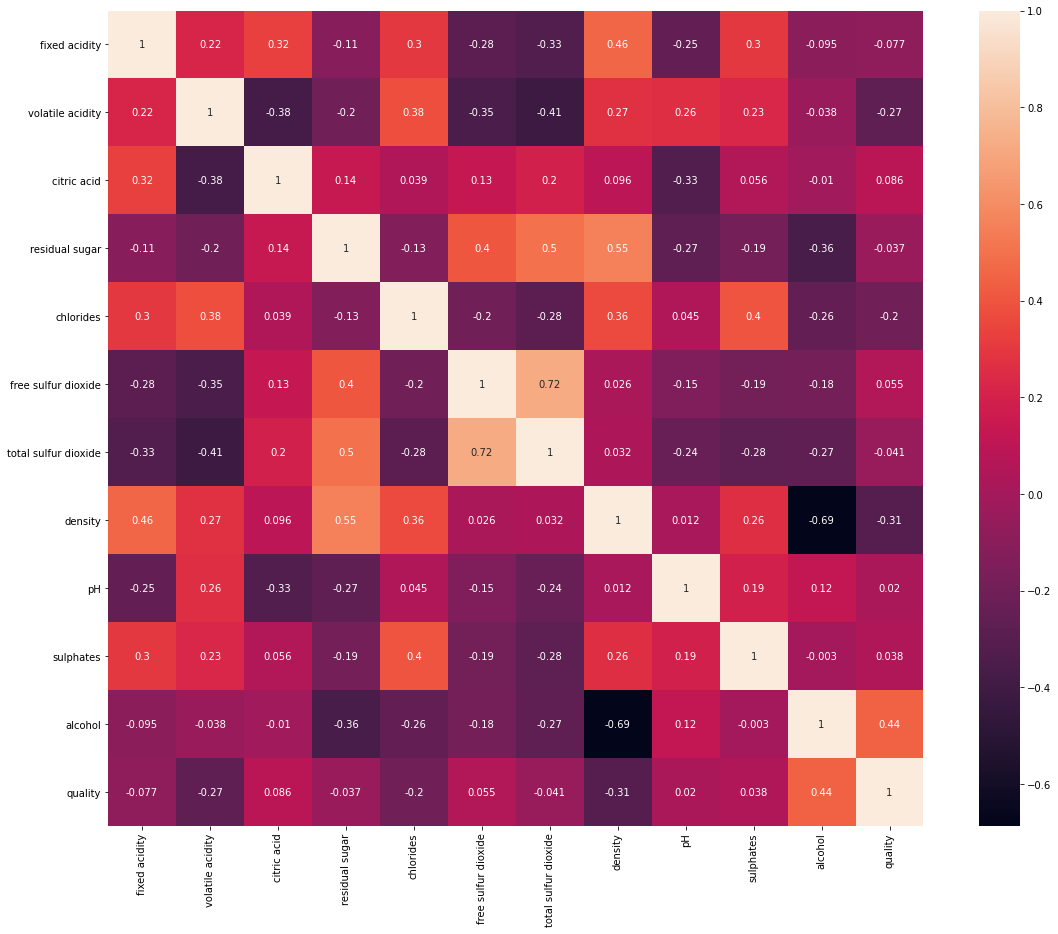

In [94]:
'''找出输出(质量)变量与所有输入变量之间的相关性，Python实现如下：'''
plt.subplots(figsize=(20,15))    #定义热力图大小为（20，15）
corr = wine.corr()    #相关系数
sns.heatmap(corr,square=True, annot=True)    #以corr为数据创建热力图

'一些如酒精，柠檬酸，游离二氧化硫，pH值呈正相关，质量会有所改善，而密度，残糖和酸度会对质量产生负面影响。让我们确定前6个相关特征。Python代码如下：'

(<Figure size 1440x1080 with 1 Axes>, <AxesSubplot:>)

<AxesSubplot:>

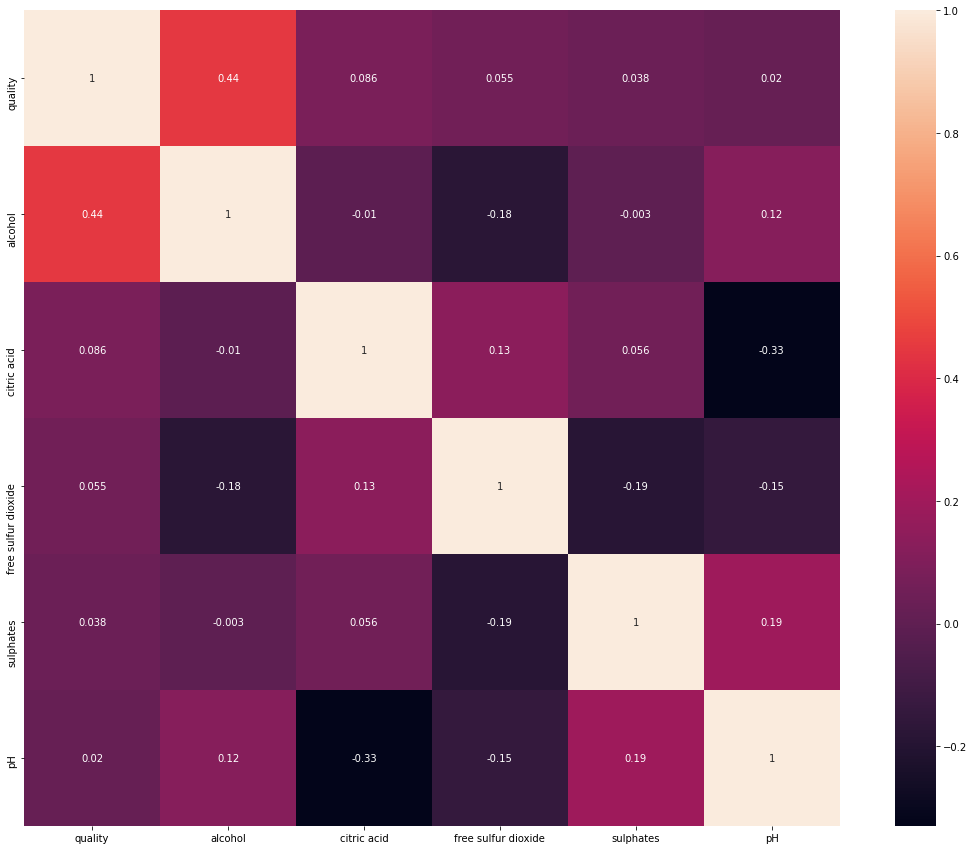

In [95]:
'''一些如酒精，柠檬酸，游离二氧化硫，pH值呈正相关，质量会有所改善，而密度，残糖和酸度会对质量产生负面影响。让我们确定前6个相关特征。Python代码如下：'''
cols = corr.nlargest(6, 'quality')['quality'].index    #找到与目标值相关性最大的6个特征，而这几个特征之间的相关性要低。
#cols = Index(['quality', 'alcohol', 'citric acid', 'free sulfur dioxide', 'sulphates','pH'],dtype='object')
corrcoef = np.corrcoef(wine[cols].values.T)    #wine[cols]是wine以cols为列属性的二维表，。values是提取表中的数据，T是转置，corrcoef是乘积矩相关系数的矩阵
plt.subplots(figsize=(20,15))    #设置热力图大小
sns.heatmap(corrcoef,square=True, annot=True, xticklabels= cols.values, yticklabels=cols.values)    #创建热力图

In [96]:
'''使用机器学习中的sklearn库，将数据集拆分为测试和训练数据集，我使用了50％的数据作为测试数据集。Python代码如下：'''
y = wine["quality"]    #获取quality列
x = wine.drop("quality", axis=1)    #删去quality列
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=0)

'使用机器学习中的sklearn库，将数据集拆分为测试和训练数据集，我使用了50％的数据作为测试数据集。Python代码如下：'

In [97]:
'''由于不同的列具有不同的值，因此使用StandardScaler库归一化值以获得准确的预测结果'''
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

'由于不同的列具有不同的值，因此使用StandardScaler库归一化值以获得准确的预测结果'

In [98]:
'''现在，我将根据各种算法拟合我的训练数据，并根据测试值确定预测输出的准确性。Python实现如下：'''
'''线性算法：'''
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
pred_logreg = logreg.predict(x_test)    #逻辑回归预测葡萄酒的质量
accuracy = accuracy_score(pred_logreg, y_test)    #计算分类准确率分数
print("Logreg Accuracy Score %.2f" % accuracy)

'现在，我将根据各种算法拟合我的训练数据，并根据测试值确定预测输出的准确性。Python实现如下：'

'线性算法：'

D:\programming software\python\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Logreg Accuracy Score 0.53


In [99]:
'''KNN'''
from sklearn.neighbors import KNeighborsClassifier
cm = confusion_matrix(pred_logreg, y_test)    #混淆矩阵
knn = KNeighborsClassifier(n_neighbors=1)    #K近邻算法，选取最近的点的个数为1
knn.fit(x_train, y_train)
pred_knn = knn.predict(x_test)    #knn算法预测葡萄酒的质量
accuracy = accuracy_score(pred_knn, y_test)    #计算分类准确率分数
print("Knn Accuracy Score %.2f" % accuracy)

'KNN'

KNeighborsClassifier(n_neighbors=1)

Knn Accuracy Score 0.57


In [100]:
'''支持向量机SVC'''
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train, y_train)    #训练数据集
pred_svc =svc.predict(x_test)    #SVC预测葡萄酒的质量
accuracy = accuracy_score(pred_svc, y_test)    #计算分类准确率分数
print("SVC Accuracy Score %.2f" % accuracy)

'支持向量机SVC'

SVC()

SVC Accuracy Score 0.56


In [101]:
'''随机森林'''
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)    #训练数据集
pred_rf =rf.predict(x_test)    #随机森林预测葡萄酒的质量
accuracy = accuracy_score(pred_rf, y_test)    #计算分类准确率分数
print("Random Forest Accuracy Score %.2f" % accuracy)

'随机森林'

RandomForestClassifier()

Random Forest Accuracy Score 0.63
